## Final Project Submission

Please fill out:
* Student name: Lucas Fishbein
* Student pace: Flex Program
* Scheduled project review date/time: 1/23/23 10:00 AM 
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@fishbeinlucas/an-analysis-of-a-few-factors-that-may-get-more-butts-in-the-movie-theaters-58b08c402093 


# Project Overview 

### Project Objective

Microsoft is plannning to break into the movie delevepment space via  the formulation of their own proprietary movie studio. Microsoft, like most movie companies, is looking to maximize their success at the box office from the get-go. 

In order to maximize this likely-hood of success, an analysis of the top performing movies since 2010 has been completed in order to attempt to distill a few of the factors that have contributed to their success, allowing Microsoft to use this as a framework on which to develop their own movies and hopefully mimic the success.

### Analysis Overview

In order to obtain the relevant data to determine the success and the factors that may have contributed to that for movies that have been released post 2010 two major movie databases were queried. 

#### Data Sources

The first data source was a IMDB database (IMDB.com) which contains basic information regarding 146,144 different movie titles that have been released since 2010. This database contains descriptive factors of movies such as their release data and genres as well as info on the cast and creators of said movie. This will provide our analysis with a number of different movie factors to choose from when determining why a movie may have been successful.

The second data source quiered was from the_numbers.com, a company that logs financial information regarding movies, such as the gross income and production budget. This database, though much smaller than the IMDB database, as it only contains 5,872 movies in total and 2,194 titles from 2010 and beyond, has extremely important production budget finicial information included that is a key piece of how we will determine the success of a movie.

When combining these two databases in order to form a new, complete database only of movies that contained all of the relevant information outlined below we end up with a sample size of 1,859. The limitations regarding this dataset are covered in depth later in this analysis. 

#### Determining the "Success" of a Movie

Microsoft like most companies is likely looking to maximize their profits while minimizing their investments, therefore the success metric used within this analysis to determine a movie's success will be the Return on Investment or ROI. ROI acts as a gauge of an investment's profitability, so a higher ROI means a that greater profitabilty in relation to the initail investment. For this analysis the investment metric will be the production budget of a movie and a movie's profitabilty will be determined via its worldwide gross income. The movies with the highest ROIs will be considered the most successful and we will compare the factors that make up the most successful movies to those of all of the movies in the dataset to determine what perctange of movies with a certain factor reached high levels of success.

#### Factors explored that may have contributed to a Movie's success

The culture surrounding movies is constantly in flux and has changed significantly over the past 100 years since their gain in popularity in the early 20th century. For this reason, this analysis focuses only on movies that were released after 2010, as it may be likely that the factors that contributed to the success movies released prior to that are no longer relevant in the modern world.

##### Genre

The genre of a movie tends to be the first descriptive piece used when describing a movie beyond it's title. People also tend to describe the types of movies that they enjoy most by their genre, therefore it is very possible that people choose what movies to see largely based on the genre. This analysis uses ROI and genre to find out what percentage of movies in each genre end up with a high level of success so we can therefore guide microsoft on which genres they should focus on.

##### Month Released

The movie viewing habits of the global population my change throughout the calendar year for a myriad of factors. This analysis compares the release month of movies with high levels of success with that of the larger database to determine what percentage of movies released in a given month reach high levels of success to therefore provide Microsoft with a recomendation on the time of year their movies should be released to maximize success liklihood. 

##### Production Budget

The production budget or, original investment into a movie is another very important factor in the early steps of movie development as this will guide many, if not almost all of the factors of a movie moving forward. In order to determine what Microsoft initial investment should be to maximize ROI, an analysis of different ranges of production budgets vs their success at each level was completed to give microsoft an idea of how much they should budget for each movie to maximize ROI.

## Project Limitations


s]s
s
s

AS
S
S


In [31]:
#Importing necessary Python Packages
import pandas as pd #Allows access to dataframes inside databases
import gzip #Allows access to .gz files in /zippedData 
import zipfile #Allows access to .zip file in /zippedData 
import sqlite3 #Allows access to IMDB SQLite database provided
import matplotlib.pyplot as plt #Creates Data visualizations
import matplotlib.ticker as mtick #Allows us to turn axis ticks into percentages
import seaborn as sns #Creates Data visualizations

In [32]:
#Accessing the data files in the zippedData folder for futher use
tn_budgets = pd.read_csv(
    'zippedData/tn.movie_budgets.csv.gz', compression='gzip')

#extracting SQL database from zip file and store unarchived version in zippedData folder 
with zipfile.ZipFile(
    'zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData/')

#Connecting to the SQL database for inspection    
imdb_sql = sqlite3.connect(
    'zippedData/im.db')


# Preparing the supplied databases for merging by adding or reformating appropriate columns to gather all relevant info for analysis


### Creating dataframe of relevant Info from relevant IMDB SQL tables

In [33]:
#Joining tables in IMDB SQL file in order to retreive the ratings for each movie
imdb_sql_query = """
SELECT 
    movie_basics.movie_id,
    movie_basics.primary_title, 
    movie_basics.original_title, 
    movie_basics.start_year, 
    movie_basics.genres
FROM movie_basics 
"""

#creating a dataframe that conatins only the information needed in order to join the rt and tn tables
imdb_joined = pd.read_sql(imdb_sql_query, imdb_sql)


## Calculating the Return on Investment (ROI) 

This will be based on worldwide gross income and production cost being sourced from the tn_budgets

### General forumla to calculate ROI:

$$
ROI = \frac{\text{Net Income}}{\text{Cost of Invetment}} * 100
$$

### Formula to calculate a Movie's ROI:
$$
ROI = \frac{\text{Worldwide Gross Income}}{\text{Production Budget}} * 100
$$



### Calculating ROI, Creating an ROI column and formating the new ROI column into integer format using TN movie budgets database

In [34]:
#Converting columns from a currency formated object to float data type for calculation
tn_budgets[tn_budgets.columns[3:6]] = tn_budgets[
                                        tn_budgets.columns[3:6]].replace(
                                        '[\$,]', '', regex=True).astype(float)


#Calculating ROI using ROI formula above and adding an ROI column to dataframe
tn_budgets['ROI(%)'] = ((tn_budgets['worldwide_gross'] 
                        / tn_budgets['production_budget'])
                        * 100).astype(int) 


### Creating a Release year and month column from the release date column in order to use year as a merging value and the month as a analysis parameter

In [35]:
#Creating a year released column in the tn db in order to use during merge with imdb dataframe
tn_budgets['start_year'] = tn_budgets['release_date'].str[-4:].astype(int)

#Takes the first three characters of the release_date string and places it in the 
tn_budgets['release_month'] = [x[:3] for x in tn_budgets['release_date']]



### Fixing formating of Movie Titles in IMBD and TN databases prior to merge

There are a variety of ways two databases can have same movie name spelt out, to combat these differences that will effect out merge results, the next cell standarizes a few of those possibilities to attempt to make the titles of the same movies between the two dataframes match

In [36]:
#Creating a dictionary of replacements to remove possible movie title descrpancies between the two databases
to_replace = {'&': 'and',
              ',': '',
              '#': '',
              r'[^\w\s]+':'',
              '-':'',
              'â':'',
              "'":"",
              ':':'',
              r'rs\.': '',
              '  ':''
             }

#Making All title categories lower case and then completed replacements above
for k, v in to_replace.items():
    imdb_joined['primary_title'] = imdb_joined['primary_title'].str.lower().str.replace(k, v)
    imdb_joined['original_title'] = imdb_joined['original_title'].str.lower().str.replace(k, v)
    tn_budgets['movie'] = tn_budgets['movie'].str.lower().str.replace(k, v)
    
#Making tn_budgets year into integers to align with imdb year
tn_budgets['start_year'] = tn_budgets['start_year'].astype(int)

#Creating a dataframe only containing movies released after 2010 to remove unnecessary data
tn_after_2010 = tn_budgets[tn_budgets['start_year'] > 2009]


### Merging IMDB and TN databases based on movie titles and year of release

In [37]:
#discoved that the release date from the tn database was sometimes the video released date and not thearter release date, fixed this by adding a tolerance of 1 year to the year merge
imdb_tn_merge = pd.merge_asof(
                tn_after_2010.sort_values('start_year'),\
                imdb_joined.sort_values('start_year'),\
                left_by ='movie',right_by='primary_title',\
                on='start_year',\
                direction='nearest',\
                tolerance = 1)


In [38]:
#Create a dataframe of what was not successfully merged to investigate the reason on a case by case basis
not_merged = imdb_tn_merge[imdb_tn_merge['movie_id'].isna()]


In [39]:
#removing the rows were were not included in the merge to only keep rows with all relevant infomation present
imdb_tn_merge = imdb_tn_merge[imdb_tn_merge['movie_id'].notna()]

### Creating a data frame that only contains the movies of high success (an ROI of 500% or more)

In [40]:
#Taking only the movies with an ROI of 500% or Higher to create a dataframe only containing movie of high success
top_movies = imdb_tn_merge[imdb_tn_merge['ROI(%)'] >= 500] 



## Release Month Analysis

### Creating Bar Graph to show the month of release used the most for Top Movies in our dataset
In order to determine which month Microsoft should release its new movies we will look for release month trends within the top 500 movies of all time

<AxesSubplot:title={'center':'Percent of Movies released per Month that had RIO >= 500%'}, xlabel='Percentage that became Highly Successful', ylabel='Month of Original Release'>

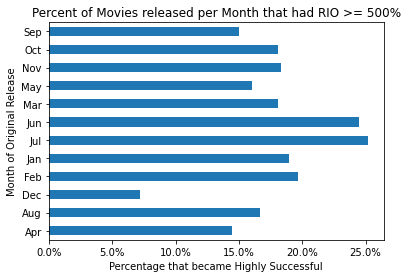

In [41]:
#Finding value counts for the months of release for the top movies and all movies in merged db
top_months = top_movies.release_month.value_counts()
all_months = imdb_tn_merge.release_month.value_counts()

#plotting the percent of movies released in a given month that ended up being a highly successfully 
months_bar = ((top_months / all_months) * 100).plot(kind='barh')

#Setting Labels for Graph
months_bar.set_xlabel('Percentage that became Highly Successful')
months_bar.xaxis.set_major_formatter(mtick.PercentFormatter()) #Formats x axis as percents
months_bar.set_ylabel('Month of Original Release')
months_bar.set_title('Percent of Movies released per Month that had RIO >= 500%')
months_bar


## Genre Analysis

In [42]:
#obtaining total number of occurences of each genre in entire merged dataset
all_movie_genre_count = imdb_tn_merge['genres'].str.split(
                        ',', expand=True).stack().value_counts()

#obtaining total number of occurences of each genre in the top movies
top_movie_genre_count = top_movies['genres'].str.split(
                        ',', expand=True).stack().value_counts()

#Dividing value counts of the genres of top movies by the value counts of the genres of all movies to get percentage per genre to be top movie
genre_percentage_data = (top_movie_genre_count/all_movie_genre_count) * 100


<AxesSubplot:title={'center':'Percent of Movies per Genre that had RIO >= 500%'}, xlabel='Percentage of Genre', ylabel='Genre'>

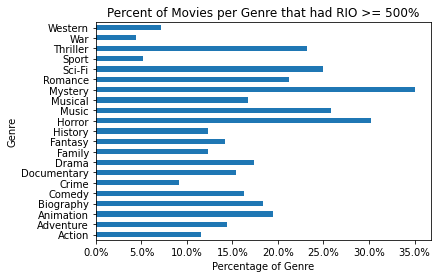

In [43]:
#Creat horizontal bar graph based on number occurences of each month
genres_bar = genre_percentage_data.plot(kind='barh')

#Setting Labels for Graph
genres_bar.set_xlabel('Percentage of Genre')
genres_bar.xaxis.set_major_formatter(mtick.PercentFormatter()) #Formats x axis as percents
genres_bar.set_ylabel('Genre')
genres_bar.set_title('Percent of Movies per Genre that had RIO >= 500%')
genres_bar

## Production Budget Analysis

### Creating a Scatter Plot to represent how Production Budget and Worldwide Gross income are related  for all movies in database as well as just the top movies


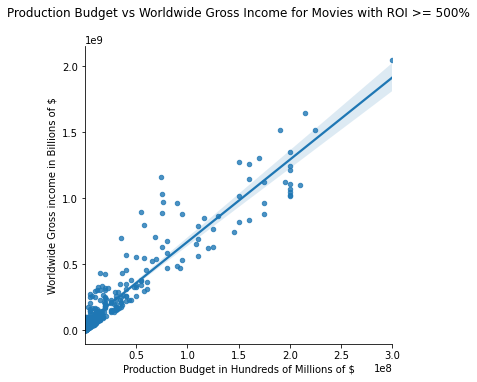

In [44]:
#Creating Top movies Scatter plot
top_wp_scat = sns.lmplot(y ='worldwide_gross',
                         x ='production_budget',
                         data= top_movies, fit_reg=True, 
                         scatter_kws={"marker": "D", "s": 20})

#Set Axis labels
plt.title('Production Budget vs Worldwide Gross Income for Movies with ROI >= 500%', y=1.08)
plt.xlabel('Production Budget in Hundreds of Millions of $')
plt.ylabel('Worldwide Gross income in Billions of $')

top_wp_scat

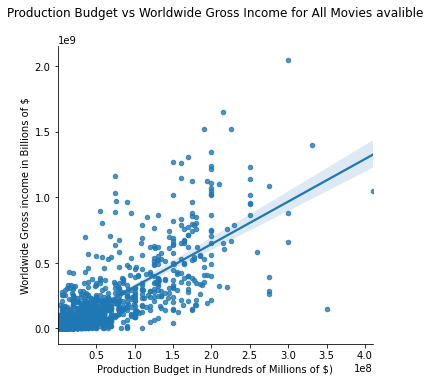

In [45]:
all_wp_scat = sns.lmplot(
                        y ='worldwide_gross',
                        x ='production_budget', 
                        data= imdb_tn_merge, 
                        fit_reg=True, 
                        scatter_kws={"marker": "D", "s": 20})

#Set Axis labels
plt.title('Production Budget vs Worldwide Gross Income for All Movies avalible', y=1.08)
plt.xlabel('Production Budget in Hundreds of Millions of $)')
plt.ylabel('Worldwide Gross income in Billions of $')

all_wp_scat

### Splitting dataframe by movie production_budget at $10,000,000 to produce two different graphs


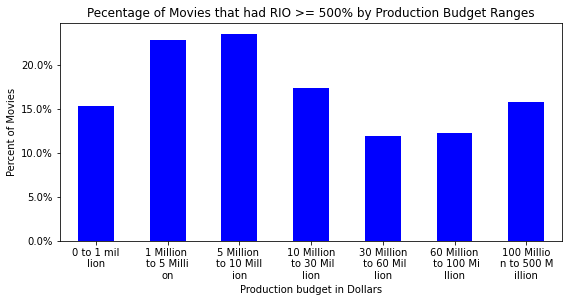

In [46]:
import re #Allows us to format axis ticks as desired

#Creating the X axis ticks labels
pb_scat_xticks = ['0 to 1 million', 
                  '1 Million to 5 Million',
                  '5 Million to 10 Million', 
                  '10 Million to 30 Million', 
                  '30 Million to 60 Million', 
                  '60 Million to 100 Million', 
                  '100 Million to 500 Million' ]

#Reformats the x axis ticks to go to a second line on the 10th character of the label
pb_scat_xticks_new = [re.sub("(.{10})", "\\1\n", label, 0, re.DOTALL)\
                      for label in pb_scat_xticks]

#Creating the bin limits in order to cut the production budgets data into specified categories 
pb_scat_bins = [0, 
                1000000, 
                5000000, 
                10000000, 
                30000000, 
                60000000, 
                100000000, 
                500000000]



#Cutting the database of all movies and the top movies' production budgets into bins designated above
all_pb_cut = pd.cut(imdb_tn_merge['production_budget'],
                    bins = pb_scat_bins, include_lowest=True)

top_pb_cut = pd.cut(top_movies['production_budget'], 
                    bins = pb_scat_bins, include_lowest=True)

#Derving the value counts for each of the production budgets bins
all_pb_cut_vc = all_pb_cut.value_counts()

top_pb_cut_vc = top_pb_cut.value_counts()

#Getting the percent of each production budget bin that became a top movie
pb_percentage = (top_pb_cut_vc/all_pb_cut_vc) * 100



#Plotting productiob budget percentage dat
pb_plot = pb_percentage.plot.bar(rot=0, color="b", figsize=(9,4))
pb_plot.set_xticklabels((pb_scat_xticks_new))
pb_plot.set_title('Pecentage of Movies that had RIO >= 500% by Production Budget Ranges')
pb_plot.set_xlabel('Production budget in Dollars')
pb_plot.set_ylabel('Percent of Movies')
pb_plot.yaxis.set_major_formatter(mtick.PercentFormatter()) #Formats y axis as percents
plt.show()


